In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [3]:
train_dir = "chest_xray/train"
val_dir   = "chest_xray/val"
test_dir  = "chest_xray/test"

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)



In [5]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)

val_data = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary"
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


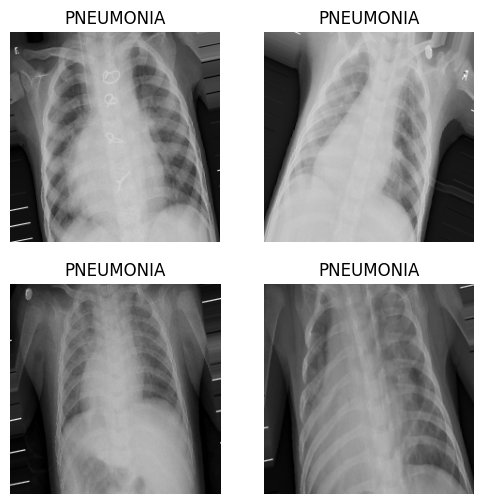

In [6]:
images, labels = next(train_data)

plt.figure(figsize=(6,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title("PNEUMONIA" if labels[i] == 1 else "NORMAL")
    plt.axis("off")
plt.show()


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


c:\Users\semse\Desktop\goruntu isleme proje\pneumonia-detection\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [9]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 122s 736ms/step - accuracy: 0.8441 - loss: 0.3798 - val_accuracy: 0.6250 - val_loss: 0.8642
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 717ms/step - accuracy: 0.9022 - loss: 0.2417 - val_accuracy: 0.8125 - val_loss: 0.5223
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 115s 707ms/step - accuracy: 0.9145 - loss: 0.2217 - val_accuracy: 0.7500 - val_loss: 0.6864
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 113s 690ms/step - accuracy: 0.9275 - loss: 0.1804 - val_accuracy: 0.7500 - val_loss: 0.5034
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 718ms/step - accuracy: 0.9281 - loss: 0.1829 - val_accuracy: 0.6875 - val_loss: 0.5511
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 718ms/step - accuracy: 0.9352 - loss: 0.1640 - val_accuracy: 0.6250 - val_loss: 0.8306
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 716ms/step - accuracy: 0.9456 - loss: 0.1515 - val_accuracy: 0.7500 - val_loss: 0.3760
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 718ms/step - accuracy: 0.9398 -

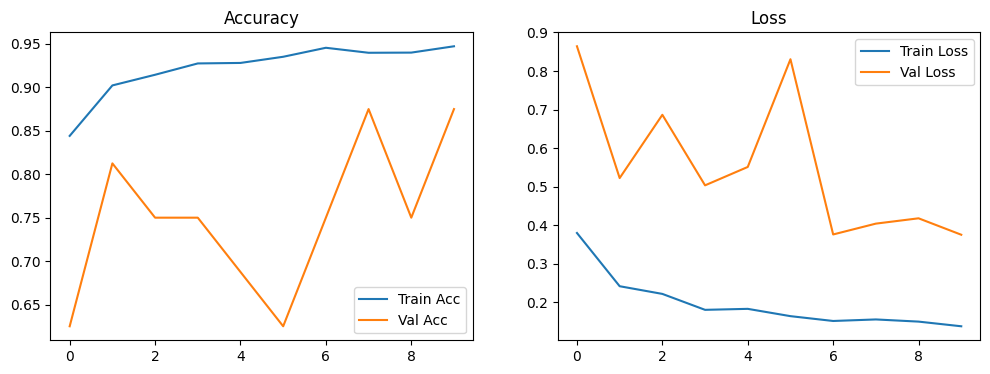

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [11]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)


Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.9006 - loss: 0.3343
Test Accuracy: 0.9006410241127014


In [12]:
from tensorflow.keras.preprocessing import image

img_path = "chest_xray/test/PNEUMONIA/person1_virus_6.jpeg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print("Tahmin:", "PNEUMONIA" if prediction[0][0] > 0.8 else "NORMAL")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Tahmin: PNEUMONIA


In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "chest_xray/test/NORMAL/IM-0001-0001.jpeg" 

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

print("Raw prediction:", prediction[0][0])

if prediction[0][0] > 0.8:
    print("PNEUMONIA")
else:
    print("NORMAL")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Raw prediction: 0.012605627
NORMAL
